In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
from d2c.descriptors import D2C, DataLoader
import pandas as pd 
dataloader = DataLoader()
dataloader.from_pickle('example/synthetic_data.pkl')
observations = dataloader.get_observations()
dags = dataloader.get_dags()
true_causal_dfs = dataloader.get_true_causal_dfs()

In [77]:
d2c_predictions = pd.read_csv('example/d2c_predictions.csv')

## No tears

In [111]:
from causalnex.structure.notears import from_pandas
from tqdm import tqdm

d2c_predictions['notears'] = 0

for graph_id in tqdm(range(len(d2c_predictions.graph_id.unique()))):

    sm = from_pandas(observations[graph_id])
    sm.remove_edges_below_threshold(0.8)

    for edge in sm.edges():
        d2c_predictions.loc[(d2c_predictions.graph_id == graph_id) & (d2c_predictions.edge_source == edge[0]) & (d2c_predictions.edge_dest == edge[1]), 'notears'] = 1

100%|██████████| 280/280 [08:07<00:00,  1.74s/it]


## Direct LINGAM

In [112]:
import lingam

d2c_predictions['DirectLiNGAM'] = 0

for graph_id in tqdm(range(len(d2c_predictions.graph_id.unique()))):

    replace_dict = {col_id: col_name for col_id, col_name in enumerate(observations[graph_id].columns)}

    model = lingam.DirectLiNGAM()
    results = model.bootstrap(observations[graph_id],n_sampling=25)
    df_lingam = results.get_total_causal_effects(min_causal_effect=None)
    df_lingam = pd.DataFrame(df_lingam)

    df_lingam['from'] = df_lingam['from'].replace(replace_dict)
    df_lingam['to'] = df_lingam['to'].replace(replace_dict)

    for a in df_lingam[['from','to']].values:
        edge = tuple(a)
        current_graph = d2c_predictions.loc[(d2c_predictions.graph_id == graph_id)  & (d2c_predictions.graph_id == graph_id) & (d2c_predictions.edge_source == edge[0]) & (d2c_predictions.edge_dest == edge[1]), 'DirectLiNGAM'] = 1 

 18%|█▊        | 49/280 [00:59<04:40,  1.21s/it]

100%|██████████| 280/280 [05:18<00:00,  1.14s/it]


## PC

In [113]:
from causallearn.search.ConstraintBased.PC import pc

from tqdm import tqdm

d2c_predictions['pc'] = 0

for graph_id in tqdm(range(len(d2c_predictions.graph_id.unique()))):

    replace_dict = {col_id: col_name for col_id, col_name in enumerate(observations[graph_id].columns)}

    dag = pc(observations[graph_id].to_numpy())
    dag.to_nx_graph()

    for edge in dag.nx_graph.edges():
        edge_from, edge_to = edge
        edge = (replace_dict[edge_from], replace_dict[edge_to])
        d2c_predictions.loc[(d2c_predictions.graph_id == graph_id) & (d2c_predictions.edge_source == edge[0]) & (d2c_predictions.edge_dest == edge[1]), 'pc'] = 1


  0%|          | 0/280 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  1%|          | 2/280 [00:00<00:16, 16.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  1%|▏         | 4/280 [00:00<00:17, 16.01it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  2%|▏         | 6/280 [00:00<00:16, 16.18it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  3%|▎         | 8/280 [00:00<00:17, 15.80it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  4%|▎         | 10/280 [00:00<00:15, 16.98it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  4%|▍         | 12/280 [00:00<00:15, 17.68it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  5%|▌         | 14/280 [00:00<00:14, 18.00it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  6%|▌         | 16/280 [00:00<00:15, 17.17it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  6%|▋         | 18/280 [00:01<00:15, 16.98it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  7%|▋         | 20/280 [00:01<00:14, 17.62it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  8%|▊         | 23/280 [00:01<00:13, 18.86it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  9%|▉         | 26/280 [00:01<00:12, 20.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 10%|█         | 29/280 [00:01<00:11, 21.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 11%|█▏        | 32/280 [00:01<00:11, 21.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 12%|█▎        | 35/280 [00:01<00:11, 20.78it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 14%|█▎        | 38/280 [00:02<00:12, 20.06it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 15%|█▍        | 41/280 [00:02<00:12, 18.90it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 15%|█▌        | 43/280 [00:02<00:12, 19.01it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 16%|█▋        | 46/280 [00:02<00:11, 20.47it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 18%|█▊        | 49/280 [00:02<00:11, 20.66it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 19%|█▊        | 52/280 [00:02<00:10, 21.09it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 20%|█▉        | 55/280 [00:02<00:11, 20.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 21%|██        | 58/280 [00:02<00:10, 21.26it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 22%|██▏       | 61/280 [00:03<00:10, 20.51it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 23%|██▎       | 64/280 [00:03<00:10, 21.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 24%|██▍       | 67/280 [00:03<00:09, 21.71it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 25%|██▌       | 70/280 [00:03<00:09, 21.92it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 26%|██▌       | 73/280 [00:03<00:09, 22.07it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 27%|██▋       | 76/280 [00:03<00:08, 22.71it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 28%|██▊       | 79/280 [00:03<00:08, 23.17it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 29%|██▉       | 82/280 [00:04<00:09, 21.58it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 30%|███       | 85/280 [00:04<00:09, 20.46it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 31%|███▏      | 88/280 [00:04<00:10, 18.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 32%|███▏      | 90/280 [00:04<00:10, 18.74it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 33%|███▎      | 92/280 [00:04<00:10, 18.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 34%|███▎      | 94/280 [00:04<00:09, 18.64it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 34%|███▍      | 96/280 [00:04<00:09, 18.57it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 35%|███▌      | 98/280 [00:04<00:10, 17.71it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 36%|███▌      | 100/280 [00:05<00:09, 18.02it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 36%|███▋      | 102/280 [00:05<00:10, 17.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 38%|███▊      | 105/280 [00:05<00:09, 18.41it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 38%|███▊      | 107/280 [00:05<00:09, 18.45it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 39%|███▉      | 109/280 [00:05<00:09, 18.31it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 40%|███▉      | 111/280 [00:05<00:09, 18.19it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 40%|████      | 113/280 [00:05<00:09, 17.75it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 41%|████      | 115/280 [00:05<00:09, 16.78it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 42%|████▏     | 117/280 [00:06<00:10, 16.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 42%|████▎     | 119/280 [00:06<00:09, 17.02it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 43%|████▎     | 121/280 [00:06<00:09, 16.75it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 44%|████▍     | 123/280 [00:06<00:09, 17.24it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 45%|████▍     | 125/280 [00:06<00:08, 17.56it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 45%|████▌     | 127/280 [00:06<00:09, 15.95it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 46%|████▌     | 129/280 [00:06<00:09, 15.55it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 47%|████▋     | 131/280 [00:06<00:09, 15.96it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 48%|████▊     | 133/280 [00:07<00:09, 15.20it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 48%|████▊     | 135/280 [00:07<00:09, 15.50it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 49%|████▉     | 137/280 [00:07<00:08, 16.50it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 50%|█████     | 140/280 [00:07<00:08, 16.69it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 51%|█████     | 142/280 [00:07<00:08, 16.25it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 51%|█████▏    | 144/280 [00:07<00:08, 16.08it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 52%|█████▏    | 146/280 [00:07<00:08, 16.14it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 53%|█████▎    | 148/280 [00:07<00:07, 16.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 54%|█████▎    | 150/280 [00:08<00:08, 16.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 54%|█████▍    | 152/280 [00:08<00:08, 15.33it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 55%|█████▌    | 154/280 [00:08<00:08, 14.98it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 56%|█████▌    | 156/280 [00:08<00:07, 15.84it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 56%|█████▋    | 158/280 [00:08<00:07, 16.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 57%|█████▊    | 161/280 [00:08<00:06, 17.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 59%|█████▊    | 164/280 [00:08<00:05, 19.41it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 59%|█████▉    | 166/280 [00:09<00:06, 17.73it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 60%|██████    | 169/280 [00:09<00:06, 18.10it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 61%|██████    | 171/280 [00:09<00:06, 17.42it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 62%|██████▏   | 173/280 [00:09<00:06, 17.06it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 62%|██████▎   | 175/280 [00:09<00:06, 16.80it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 63%|██████▎   | 177/280 [00:09<00:06, 16.96it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 64%|██████▍   | 179/280 [00:09<00:06, 16.77it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 65%|██████▌   | 182/280 [00:09<00:05, 18.02it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 66%|██████▌   | 185/280 [00:10<00:05, 17.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 67%|██████▋   | 187/280 [00:10<00:05, 16.20it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 68%|██████▊   | 189/280 [00:10<00:05, 16.43it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 68%|██████▊   | 191/280 [00:10<00:05, 15.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 69%|██████▉   | 193/280 [00:10<00:05, 14.59it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 70%|██████▉   | 195/280 [00:10<00:05, 15.07it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 70%|███████   | 197/280 [00:10<00:05, 16.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 71%|███████   | 199/280 [00:11<00:04, 16.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 72%|███████▏  | 201/280 [00:11<00:04, 16.67it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 73%|███████▎  | 204/280 [00:11<00:04, 18.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 74%|███████▎  | 206/280 [00:11<00:03, 18.58it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 74%|███████▍  | 208/280 [00:11<00:04, 17.90it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 75%|███████▌  | 210/280 [00:11<00:03, 17.74it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 76%|███████▌  | 213/280 [00:11<00:03, 18.26it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 77%|███████▋  | 215/280 [00:11<00:03, 17.71it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 78%|███████▊  | 218/280 [00:12<00:03, 19.09it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 79%|███████▉  | 221/280 [00:12<00:02, 20.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 80%|████████  | 224/280 [00:12<00:03, 18.54it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 81%|████████  | 226/280 [00:12<00:02, 18.61it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 81%|████████▏ | 228/280 [00:12<00:02, 18.75it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 82%|████████▏ | 230/280 [00:12<00:02, 18.84it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 83%|████████▎ | 233/280 [00:12<00:02, 20.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 84%|████████▍ | 236/280 [00:12<00:02, 20.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 85%|████████▌ | 239/280 [00:13<00:02, 19.41it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 86%|████████▌ | 241/280 [00:13<00:02, 18.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 87%|████████▋ | 243/280 [00:13<00:02, 18.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 88%|████████▊ | 245/280 [00:13<00:01, 17.65it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 88%|████████▊ | 247/280 [00:13<00:01, 17.45it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 89%|████████▉ | 249/280 [00:13<00:01, 17.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 90%|████████▉ | 251/280 [00:13<00:01, 17.28it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 90%|█████████ | 253/280 [00:13<00:01, 16.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 91%|█████████▏| 256/280 [00:14<00:01, 17.56it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 92%|█████████▏| 258/280 [00:14<00:01, 17.14it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 93%|█████████▎| 260/280 [00:14<00:01, 16.43it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 94%|█████████▎| 262/280 [00:14<00:01, 15.79it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 94%|█████████▍| 264/280 [00:14<00:00, 16.55it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 95%|█████████▌| 267/280 [00:14<00:00, 17.77it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 96%|█████████▌| 269/280 [00:14<00:00, 17.70it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 97%|█████████▋| 271/280 [00:15<00:00, 17.65it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 98%|█████████▊| 273/280 [00:15<00:00, 17.64it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 98%|█████████▊| 275/280 [00:15<00:00, 18.16it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 99%|█████████▉| 277/280 [00:15<00:00, 17.14it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 280/280 [00:15<00:00, 18.02it/s]


## FCI

In [114]:
from causallearn.search.ConstraintBased.FCI import fci  #TODO: double check the output of fci

from tqdm import tqdm

d2c_predictions['fci'] = 0

for graph_id in tqdm(range(len(d2c_predictions.graph_id.unique()))):

    replace_dict = {col_id: col_name for col_id, col_name in enumerate(observations[graph_id].columns)}

    dag, edges = fci(observations[graph_id].to_numpy())

    for edge in edges:
        edge_from = edge.get_node1().get_name()
        edge_to = edge.get_node2().get_name()
        d2c_predictions.loc[(d2c_predictions.graph_id == graph_id) & (d2c_predictions.edge_source == edge_from) & (d2c_predictions.edge_dest == edge_to), 'fci'] = 1


  0%|          | 0/280 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

  1%|          | 3/280 [00:00<00:11, 23.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  2%|▏         | 6/280 [00:00<00:11, 24.09it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X6


  0%|          | 0/6 [00:00<?, ?it/s]

  3%|▎         | 9/280 [00:00<00:11, 24.41it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

  4%|▍         | 12/280 [00:00<00:10, 25.90it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  5%|▌         | 15/280 [00:00<00:10, 25.49it/s]

X2 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

  6%|▋         | 18/280 [00:00<00:10, 25.09it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  8%|▊         | 21/280 [00:00<00:09, 26.38it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  9%|▉         | 25/280 [00:00<00:08, 28.37it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 10%|█         | 29/280 [00:01<00:08, 29.10it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 12%|█▏        | 33/280 [00:01<00:08, 29.78it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

 13%|█▎        | 36/280 [00:01<00:08, 29.50it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 14%|█▍        | 39/280 [00:01<00:08, 28.72it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 15%|█▌        | 43/280 [00:01<00:08, 29.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X5


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 47/280 [00:01<00:07, 30.26it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 18%|█▊        | 51/280 [00:01<00:07, 30.18it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

 20%|█▉        | 55/280 [00:01<00:07, 30.11it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 21%|██        | 59/280 [00:02<00:07, 30.92it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 22%|██▎       | 63/280 [00:02<00:07, 30.38it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 24%|██▍       | 67/280 [00:02<00:06, 30.79it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 25%|██▌       | 71/280 [00:02<00:06, 31.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 27%|██▋       | 75/280 [00:02<00:06, 31.59it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 28%|██▊       | 79/280 [00:02<00:06, 32.48it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 30%|██▉       | 83/280 [00:02<00:06, 30.78it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 31%|███       | 87/280 [00:02<00:06, 30.06it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

 32%|███▎      | 91/280 [00:03<00:06, 28.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 34%|███▎      | 94/280 [00:03<00:06, 28.65it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X3 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

 35%|███▍      | 97/280 [00:03<00:06, 27.82it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

 36%|███▌      | 100/280 [00:03<00:06, 27.65it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 37%|███▋      | 103/280 [00:03<00:06, 28.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 38%|███▊      | 106/280 [00:03<00:06, 27.31it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

 39%|███▉      | 109/280 [00:03<00:06, 27.04it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 40%|████      | 112/280 [00:03<00:06, 27.19it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

 41%|████      | 115/280 [00:04<00:06, 26.08it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

 42%|████▏     | 118/280 [00:04<00:06, 25.95it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

 43%|████▎     | 121/280 [00:04<00:06, 26.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 45%|████▍     | 125/280 [00:04<00:05, 27.37it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X3 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

 46%|████▌     | 128/280 [00:04<00:05, 25.83it/s]

X2 --> X1
X1 --> X4
X5 --> X2
X4 --> X5


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 47%|████▋     | 131/280 [00:04<00:05, 25.58it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 48%|████▊     | 134/280 [00:04<00:05, 24.58it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 49%|████▉     | 137/280 [00:04<00:05, 25.85it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 50%|█████     | 140/280 [00:04<00:05, 26.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 51%|█████     | 143/280 [00:05<00:05, 26.64it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

 52%|█████▏    | 146/280 [00:05<00:05, 25.43it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 53%|█████▎    | 149/280 [00:05<00:05, 25.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 54%|█████▍    | 152/280 [00:05<00:05, 23.84it/s]

X2 --> X5


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 55%|█████▌    | 155/280 [00:05<00:05, 24.43it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 56%|█████▋    | 158/280 [00:05<00:04, 25.52it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 58%|█████▊    | 162/280 [00:05<00:04, 27.83it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 59%|█████▉    | 165/280 [00:05<00:04, 27.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 60%|██████    | 169/280 [00:06<00:03, 28.82it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 62%|██████▏   | 173/280 [00:06<00:03, 27.57it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 63%|██████▎   | 176/280 [00:06<00:03, 27.22it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 64%|██████▍   | 179/280 [00:06<00:03, 27.20it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 65%|██████▌   | 183/280 [00:06<00:03, 28.82it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X6


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 66%|██████▋   | 186/280 [00:06<00:03, 27.00it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X3
X4 --> X1
X3 --> X2
X2 --> X5


 68%|██████▊   | 189/280 [00:06<00:03, 25.20it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 69%|██████▊   | 192/280 [00:07<00:03, 23.28it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 70%|██████▉   | 195/280 [00:07<00:03, 23.67it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 71%|███████   | 199/280 [00:07<00:03, 25.37it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 72%|███████▎  | 203/280 [00:07<00:02, 27.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 74%|███████▎  | 206/280 [00:07<00:02, 27.46it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 75%|███████▍  | 209/280 [00:07<00:02, 27.04it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 76%|███████▌  | 212/280 [00:07<00:02, 27.67it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X3 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

 77%|███████▋  | 215/280 [00:07<00:02, 27.13it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 78%|███████▊  | 219/280 [00:07<00:02, 28.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 79%|███████▉  | 222/280 [00:08<00:02, 28.54it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 80%|████████  | 225/280 [00:08<00:01, 28.84it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X3 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 81%|████████▏ | 228/280 [00:08<00:01, 27.74it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 83%|████████▎ | 232/280 [00:08<00:01, 29.70it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 84%|████████▍ | 235/280 [00:08<00:01, 29.45it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

 85%|████████▌ | 238/280 [00:08<00:01, 28.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

 86%|████████▌ | 241/280 [00:08<00:01, 28.03it/s]

X1 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 87%|████████▋ | 244/280 [00:08<00:01, 27.96it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

 88%|████████▊ | 247/280 [00:08<00:01, 27.11it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X3
X2 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

 89%|████████▉ | 250/280 [00:09<00:01, 26.78it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X2 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

X3 --> X2
X6 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

 90%|█████████ | 253/280 [00:09<00:01, 25.21it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 91%|█████████▏| 256/280 [00:09<00:00, 25.74it/s]

X4 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 92%|█████████▎| 259/280 [00:09<00:00, 24.96it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4
X4 --> X3


  0%|          | 0/6 [00:00<?, ?it/s]

 94%|█████████▎| 262/280 [00:09<00:00, 23.95it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 95%|█████████▍| 265/280 [00:09<00:00, 25.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 96%|█████████▌| 268/280 [00:09<00:00, 25.78it/s]

X3 --> X2


  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 97%|█████████▋| 271/280 [00:09<00:00, 25.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

 98%|█████████▊| 274/280 [00:10<00:00, 26.28it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X1


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

 99%|█████████▉| 277/280 [00:10<00:00, 25.55it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

X1 --> X4


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 280/280 [00:10<00:00, 27.31it/s]


## GES 

In [115]:
from causallearn.search.ScoreBased.GES import ges 
#TODO: double check the output of ges 
#TODO: how to consider undirected edges? 


d2c_predictions['ges'] = 0

for graph_id in tqdm(range(len(d2c_predictions.graph_id.unique()))):

    replace_dict = {col_id: col_name for col_id, col_name in enumerate(observations[graph_id].columns)}

    G = ges(observations[graph_id].to_numpy())['G']

    directed_edges = []
    undirected_edges = []
    for i in range(G.graph.shape[0]):
        for j in range(G.graph.shape[1]):
            if ((G.graph[i,j]==1) & (G.graph[j,i]==-1)):
                directed_edges.append((i,j)) #indicates i --> j
            elif ((G.graph[i,j]==-1) & (G.graph[j,i]==-1)):
                    undirected_edges.append((i,j))

    for edge in directed_edges:
        edge_from = replace_dict(edge[0])
        edge_to = replace_dict(edge[1])
        print(edge_from, edge_to)
        d2c_predictions.loc[(d2c_predictions.graph_id == graph_id) & (d2c_predictions.edge_source == edge_from) & (d2c_predictions.edge_dest == edge_to), 'ges'] = 1


  0%|          | 0/280 [00:00<?, ?it/s]


TypeError: 'dict' object is not callable

In [50]:
d2c_predictions.to_csv('example/d2c_notears_predictions.csv', index=False)

In [57]:
d2c_predictions['truth'] = pd.concat(true_causal_dfs)['is_causal'].values

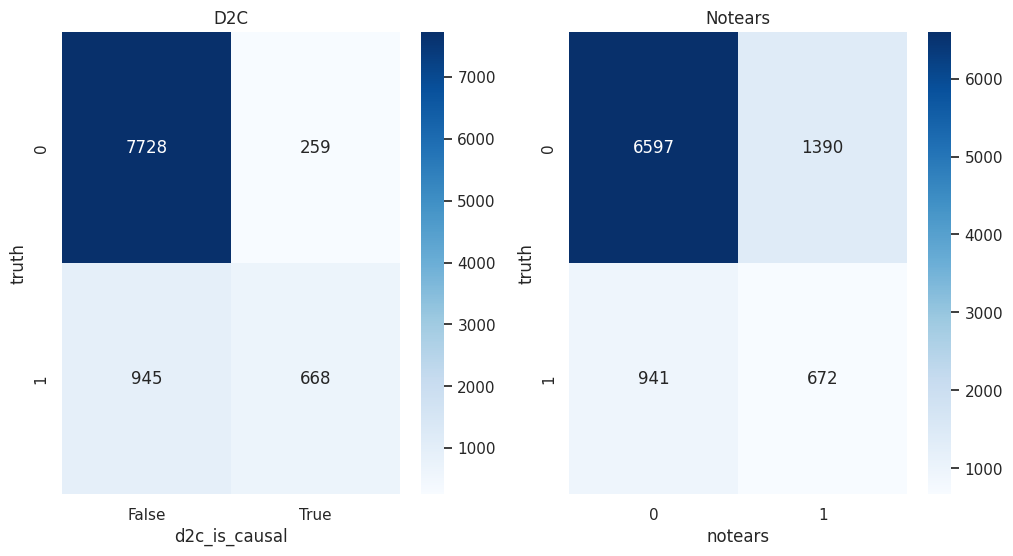

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

d2c_accuracy = accuracy_score(d2c_predictions['truth'], d2c_predictions['d2c_is_causal'])
d2c_precision = precision_score(d2c_predictions['truth'], d2c_predictions['d2c_is_causal'])
d2c_recall = recall_score(d2c_predictions['truth'], d2c_predictions['d2c_is_causal'])
d2c_f1 = f1_score(d2c_predictions['truth'], d2c_predictions['d2c_is_causal'])

notears_accuracy = accuracy_score(d2c_predictions['truth'], d2c_predictions['notears'])
notears_precision = precision_score(d2c_predictions['truth'], d2c_predictions['notears'])
notears_recall = recall_score(d2c_predictions['truth'], d2c_predictions['notears'])
notears_f1 = f1_score(d2c_predictions['truth'], d2c_predictions['notears'])

#plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pd.crosstab(d2c_predictions['truth'], d2c_predictions['d2c_is_causal']), annot=True, fmt='d', cmap='Blues', ax=ax[0])
sns.heatmap(pd.crosstab(d2c_predictions['truth'], d2c_predictions['notears']), annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[0].set_title('D2C')
ax[1].set_title('Notears')
plt.show()



In [15]:
causal_df

effect p_value probability  is_causal  notears
From To                                               
X0   X1   None    None        None          0        1
     X2   None    None        None          0        1
     X3   None    None        None          0        0
     U0   None    None        None          0        1
     U1   None    None        None          0        1
X1   X0   None    None        None          0        1
     X2   None    None        None          1        1
     X3   None    None        None          0        0
     U0   None    None        None          0        1
     U1   None    None        None          0        1
X2   X0   None    None        None          1        1
     X1   None    None        None          0        1
     X3   None    None        None          0        0
     U0   None    None        None          0        1
     U1   None    None        None          0        1
X3   X0   None    None        None          0        0
     X1   None    None        None          0        0
     X2   None    None        None          1        0
     U0   None    None        None          0        0
     U1   None    None        None          0        0
U0   X0   None    None        None          0        1
     X1   None    None        None          1        1
     X2   None    None        None          0        1
     X3   None    None        None          0        0
     U1   None    None        None          0        1
U1   X0   None    None        None          1        1
     X1   None    None        None          0        1
     X2   None    None        None          0        1
     X3   None    None        None          0        0
     U0   None    None        None          0        1

In [21]:
sm.edges

OutEdgeView([('X0', 'X1'), ('X0', 'X2'), ('X0', 'X3'), ('X0', 'U0'), ('X0', 'U1'), ('X1', 'X0'), ('X1', 'X2'), ('X1', 'X3'), ('X1', 'U0'), ('X1', 'U1'), ('X2', 'X0'), ('X2', 'X1'), ('X2', 'X3'), ('X2', 'U0'), ('X2', 'U1'), ('X3', 'X0'), ('X3', 'X1'), ('X3', 'X2'), ('X3', 'U0'), ('X3', 'U1'), ('U0', 'X0'), ('U0', 'X1'), ('U0', 'X2'), ('U0', 'X3'), ('U0', 'U1'), ('U1', 'X0'), ('U1', 'X1'), ('U1', 'X2'), ('U1', 'X3'), ('U1', 'U0')])

In [19]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.show("01_fully_connected.html")

01_fully_connected.html


In [5]:
output

NameError: name 'output' is not defined